In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv('datasets/sales.csv')


In [10]:
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

In [11]:
X = df.drop('satisfied ', axis=1)  # replace 'target_column' with your actual target column name
y = df['satisfied ']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predictions
predictions = clf.predict(X_test)

# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

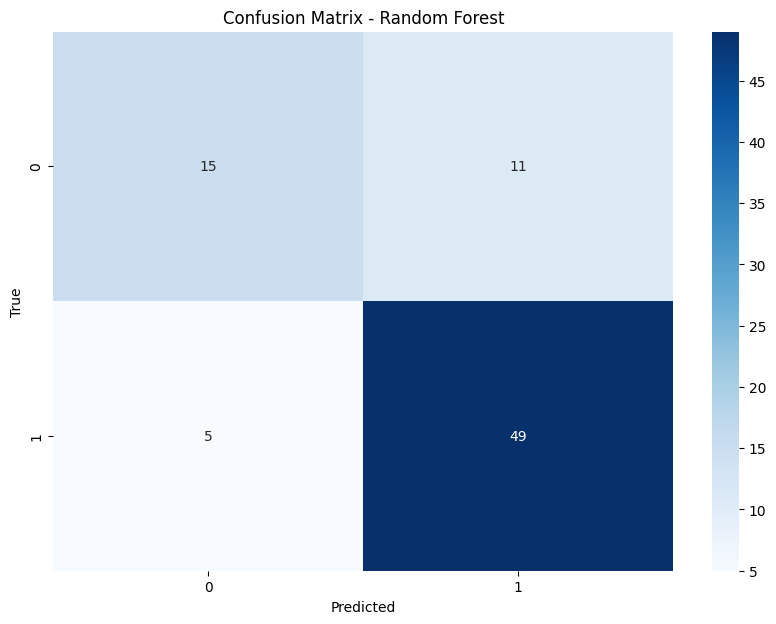

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()